In [4]:
#Libraries Importing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.datasets import boston_housing

In [34]:
#loading The data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [73]:
#Normalizing the Data
x_train = StandardScaler.fit_transform(x_train)
x_test = StandardScaler.fit_transform(x_test)

In [66]:
#Model Creation
#Input shape is the same as the data features size
#Adding Regularizing Term L2 to avoid  overfitting
#Relu activation for hidden layers  and linear for output
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,), kernel_regularizer=keras.regularizers.l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dense(1, activation = 'linear')
])
#Adam Optimizer  with mse loss for updating weights
#Metrics are RMSE and MAE and MSE
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='rmse'),
        tf.keras.metrics.MeanAbsoluteError(name='mae'),
        tf.keras.metrics.MeanSquaredError(name='mse')
    ]
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
#Model Training
#looping over the data 100 times and updating weights every 32 sample
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1,validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 565.1885 - mae: 21.8420 - mse: 564.7758 - rmse: 23.7497 - val_loss: 545.5628 - val_mae: 21.9427 - val_mse: 545.1403 - val_rmse: 23.3482
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 514.2357 - mae: 21.0785 - mse: 513.8051 - rmse: 22.6516 - val_loss: 435.5341 - val_mae: 19.5255 - val_mse: 435.0685 - val_rmse: 20.8583
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 342.9273 - mae: 17.2080 - mse: 342.4461 - rmse: 18.4988 - val_loss: 265.3808 - val_mae: 14.8330 - val_mse: 264.8403 - val_rmse: 16.2739
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 214.9796 - mae: 12.8109 - mse: 214.4157 - rmse: 14.6041 - val_loss: 116.5360 - val_mae: 8.7349 - val_mse: 115.8974 - val_rmse: 10.7656
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 87.2175 - mae: 7.6738 - mse: 86.5589 - rmse: 9.3006 - val_loss: 75.5857 - val_mae: 7.0677 - val_mse: 74.8764 - val_rmse: 8.6531
Epoch 6/100
11/11 ━━━━━━━━━━━━

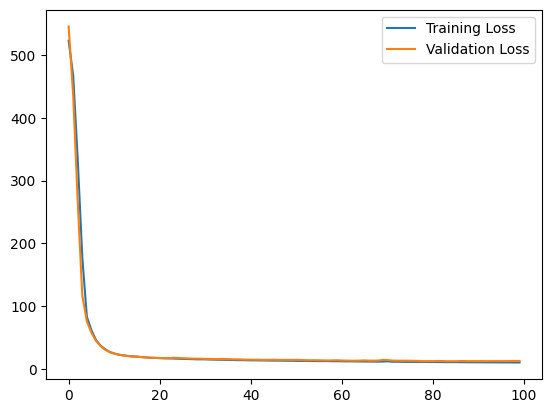

In [79]:
#plotting Trian loss vs Validation loss
trian_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
plt.plot(trian_loss, label='Training Loss')
plt.plot(valid_loss, label='Validation Loss')
plt.legend()
plt.show()

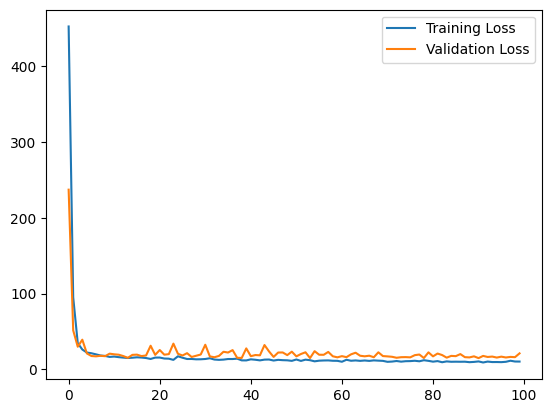

In [89]:
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(13,) , kernel_regularizer=keras.regularizers.l1(0.01)),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)),
    Dense(1, activation = 'linear')
])
model_2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,clipvalue=1.0),
    loss='mean_squared_error',
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='rmse'),
        tf.keras.metrics.MeanAbsoluteError(name='mae'),
        tf.keras.metrics.MeanSquaredError(name='mse')
    ]
)
#Model Training
model_2.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0,validation_split=0.2)
trian_loss_2 = model_2.history.history['loss']
valid_loss_2 = model_2.history.history['val_loss']
plt.plot(trian_loss_2, label='Training Loss')
plt.plot(valid_loss_2, label='Validation Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


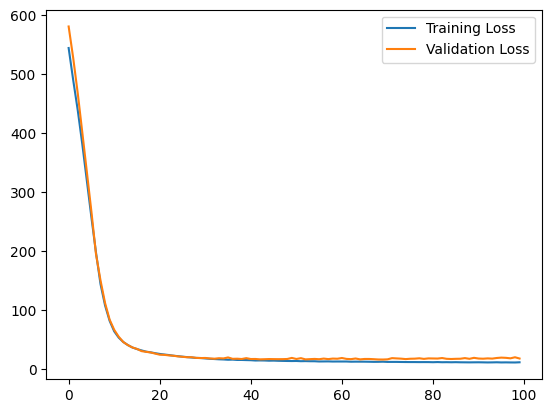

In [76]:
model_3 = Sequential([
    Dense(64, activation='relu', input_shape=(13,), kernel_regularizer=keras.regularizers.l1(0.01) ),
    Dense(32, activation='relu' , kernel_regularizer=keras.regularizers.l1(0.01)),
    Dense(1, activation = 'linear')
])
model_3.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='rmse'),
        tf.keras.metrics.MeanAbsoluteError(name='mae'),
        tf.keras.metrics.MeanSquaredError(name='mse')
    ]
)
#Model Training
model_3.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0,validation_split=0.2)
trian_loss_3 = model_3.history.history['loss']
valid_loss_3 = model_3.history.history['val_loss']
plt.plot(trian_loss_3, label='Training Loss')
plt.plot(valid_loss_3, label='Validation Loss')
plt.legend()
plt.show()

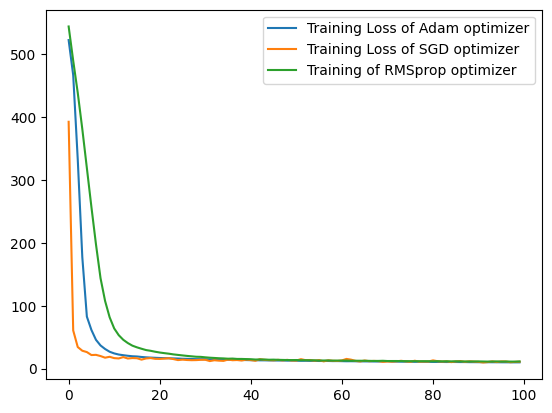

In [86]:
plt.plot(trian_loss, label='Training Loss of Adam optimizer')
plt.plot(trian_loss_2, label='Training Loss of SGD optimizer')
plt.plot(trian_loss_3, label='Training of RMSprop optimizer')
plt.legend()
plt.show()

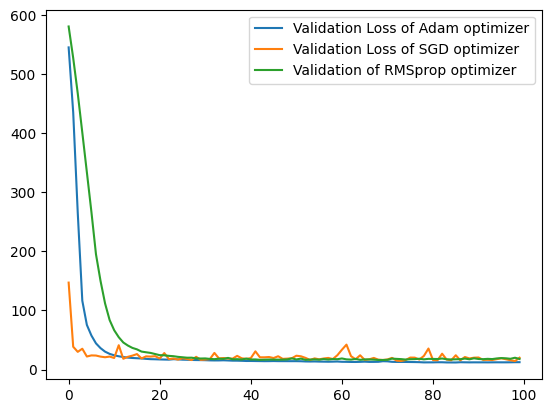

In [87]:
plt.plot(valid_loss, label='Validation Loss of Adam optimizer')
plt.plot(valid_loss_2, label='Validation Loss of SGD optimizer')
plt.plot(valid_loss_3, label='Validation of RMSprop optimizer')
plt.legend()
plt.show()